In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
data = pd.read_csv('/content/Auction_master_train.csv')

In [ ]:
data.shape

(1933, 41)

#### Column 확인

Auction_key: 경매 아파트 고유키 값

Auction_class: 경매 구분 - 강제경매 / 임의 경매

Bid_class: 입찰구분 - 일반/개별/일괄

Claim_price: 경매 신청인의 청구 금액

Appraisal_company: 감정사

Appraisal_date: 감정일자

Auction_count: 총 경매횟수

Auction_miscarriage_count: 총 유찰횟수

Total_land_gross_area: 총 토지 전체면적 ($m^2$)

Total_land_real_area: 총 토지 실면적 ($m^2$)

Total_land_auction_area: 총 토지 경매 면적 ($m^2$)

Total_building_area: 총 건물 면적 ($m^2$)

Total_building_auction_area: 총 건물 경매 면적 ($m^2$)

Total_appraisal_price: 총 감정가

Minimum_sales_price: 최저 매각 가격 (입찰 시 최저로 제시해야 하는 금액)

First_auction_date: 최초 경매일

Final_auction_date: 최종 경매일

Final_result: 최종결과

Creditor: 채권자, 경매 신청인

addr_do: 주소 - 시도

addr_si: 주소 - 시군구

addr_dong: 주소 - 읍면동

addr_li: 주소 - 리

addr_san : 주소 - 산번지 여부

addr_bunji1: 주소 - 번지1

addr_bunji2: 주소 - 번지2

addr_etc: 주소 - 기타주소

Apartment_usage: 건물(토지)의 대표 용도

Completion_date: 준공일

Preserve_regist_date: 보존등기일 (건물을 신축하고 처음으로 등기한 날짜)

Total_floor: 총 층 수

Current_floor: 현재 층 수

Specific: 기타 특이사항

Share_auction_YorN: 지분경매 여부 (하나의 부동산이 전체가 아닌 일부만 경매 진행)

road_name: 도로명주소 - 도로명

road_bunji1: 도로명주소 - 번지1

road_bunji2: 도로명주소 - 번지2

Close-date: 종국일자

Close_result: 종국 결과, 낙찰과 배당의 차이

point.y: 위도

point.x 경도

Hammer_price: 낙찰가

In [ ]:
data.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


### **기본 통계학적 정보는 뽑아내자**

In [ ]:
data.describe(include='all')

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
count,1933.000000,1933,1933,1.933000e+03,1933,1933,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1933,1933,1933,1933,1933,1933,1933,23,1933,1929.000000,889.000000,1933,1933,1933,1933.000000,1933.000000,64,1933,1933,1909.000000,155.000000,1933,1933,1933.000000,1933.000000,1.933000e+03
unique,NaN,2,3,NaN,238,712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498,405,1,448,2,39,285,9,2,NaN,NaN,1929,2,1256,NaN,NaN,55,2,1038,NaN,NaN,389,2,NaN,NaN,NaN
top,NaN,임의,일반,NaN,자연감정,2015-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-26 00:00:00,2016-04-26 00:00:00,낙찰,Private,서울,노원구,상계동,모전리,N,NaN,NaN,1층 101호,아파트,1111-11-11 00:00:00,NaN,NaN,"**1차감정: 220,000,000",N,마포대로,NaN,NaN,2016-09-08 00:00:00,배당,NaN,NaN,NaN
freq,NaN,1439,1796,NaN,33,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,19,1933,483,1242,129,52,10,1912,NaN,NaN,3,1656,43,NaN,NaN,5,1854,33,NaN,NaN,37,1921,NaN,NaN,NaN
mean,1380.271081,NaN,NaN,3.703908e+08,NaN,NaN,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601.952307,22.742407,NaN,NaN,NaN,16.980859,8.817900,NaN,NaN,NaN,127.441069,12.748387,NaN,NaN,36.698018,127.731667,4.726901e+08
std,801.670470,NaN,NaN,1.337869e+09,NaN,NaN,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554.119824,67.000807,NaN,NaN,NaN,9.509021,8.044644,NaN,NaN,NaN,188.394217,10.735663,NaN,NaN,1.150269,0.993055,5.574493e+08
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,35.051385,126.809393,6.303000e+06
25%,691.000000,NaN,NaN,7.746112e+07,NaN,NaN,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.000000,1.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,NaN,24.000000,5.000000,NaN,NaN,35.188590,126.959167,1.975550e+08
50%,1395.000000,NaN,NaN,1.728143e+08,NaN,NaN,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.000000,5.000000,NaN,NaN,NaN,15.000000,7.000000,NaN,NaN,NaN,57.000000,9.000000,NaN,NaN,37.500862,127.065003,3.544500e+08
75%,2062.000000,NaN,NaN,3.565089e+08,NaN,NaN,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.000000,18.000000,NaN,NaN,NaN,21.000000,12.000000,NaN,NaN,NaN,145.000000,17.500000,NaN,NaN,37.566116,129.018054,5.599000e+08


## date에 따른 가격 변화 한 번 볼까...?

In [ ]:
data_date= data[['Appraisal_date','Hammer_price']]

In [ ]:
data_date

,Appraisal_date,Hammer_price
0,2017-07-26 00:00:00,760000000
1,2016-09-12 00:00:00,971889999
2,2016-11-22 00:00:00,93399999
3,2016-12-13 00:00:00,256899000
4,2016-03-07 00:00:00,158660000
...,...,...
1928,2017-02-16 00:00:00,402500000
1929,2015-02-21 00:00:00,430234600
1930,2016-10-21 00:00:00,1118999990
1931,2016-06-17 00:00:00,403000000


In [ ]:
data_date_sort=data_date.sort_values(by=['Appraisal_date'],axis=0)
data_date_sort

,Appraisal_date,Hammer_price
563,2010-06-27 00:00:00,204888800
731,2011-12-31 00:00:00,187500000
830,2012-01-03 00:00:00,541000000
1415,2012-06-08 00:00:00,453100000
658,2012-06-11 00:00:00,142630000
...,...,...
1907,2017-11-10 00:00:00,36300000
1891,2017-11-14 00:00:00,1427695990
1084,2017-11-20 00:00:00,336800000
1809,2017-11-28 00:00:00,116000000


In [ ]:
new_date_data = data_date_sort.set_index('Appraisal_date')

In [ ]:
new_date_data

,Hammer_price
Appraisal_date,
2010-06-27 00:00:00,204888800
2011-12-31 00:00:00,187500000
2012-01-03 00:00:00,541000000
2012-06-08 00:00:00,453100000
2012-06-11 00:00:00,142630000
...,...
2017-11-10 00:00:00,36300000
2017-11-14 00:00:00,1427695990
2017-11-20 00:00:00,336800000


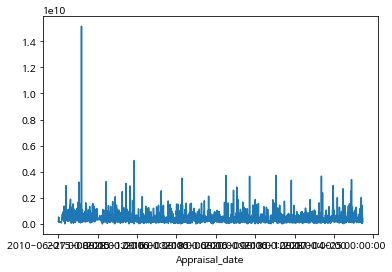

In [ ]:
new_date_data['Hammer_price'].plot()

뭐 시기에 따라 가격에 크게 차이가 있는 그런 trend가 보이지는 않았다....

In [29]:
data_onehot = pd.get_dummies(data= data, columns = ['Auction_class','Bid_class','Share_auction_YorN','Close_result','addr_si'])

one-hot 했을때는 설마

In [30]:
data_onehot.corr()["Hammer_price"]

Auction_key                 -0.418769
Claim_price                  0.267728
Auction_count               -0.016999
Auction_miscarriage_count   -0.011296
Total_land_gross_area        0.070466
                               ...   
addr_si_은평구                 -0.041104
addr_si_종로구                  0.021263
addr_si_중구                  -0.004104
addr_si_중랑구                 -0.036585
addr_si_해운대구                -0.031886
Name: Hammer_price, Length: 68, dtype: float64

뭐 상관도 낮은데 걍 binary 한것들이니까 혹시나... box plot 그리자

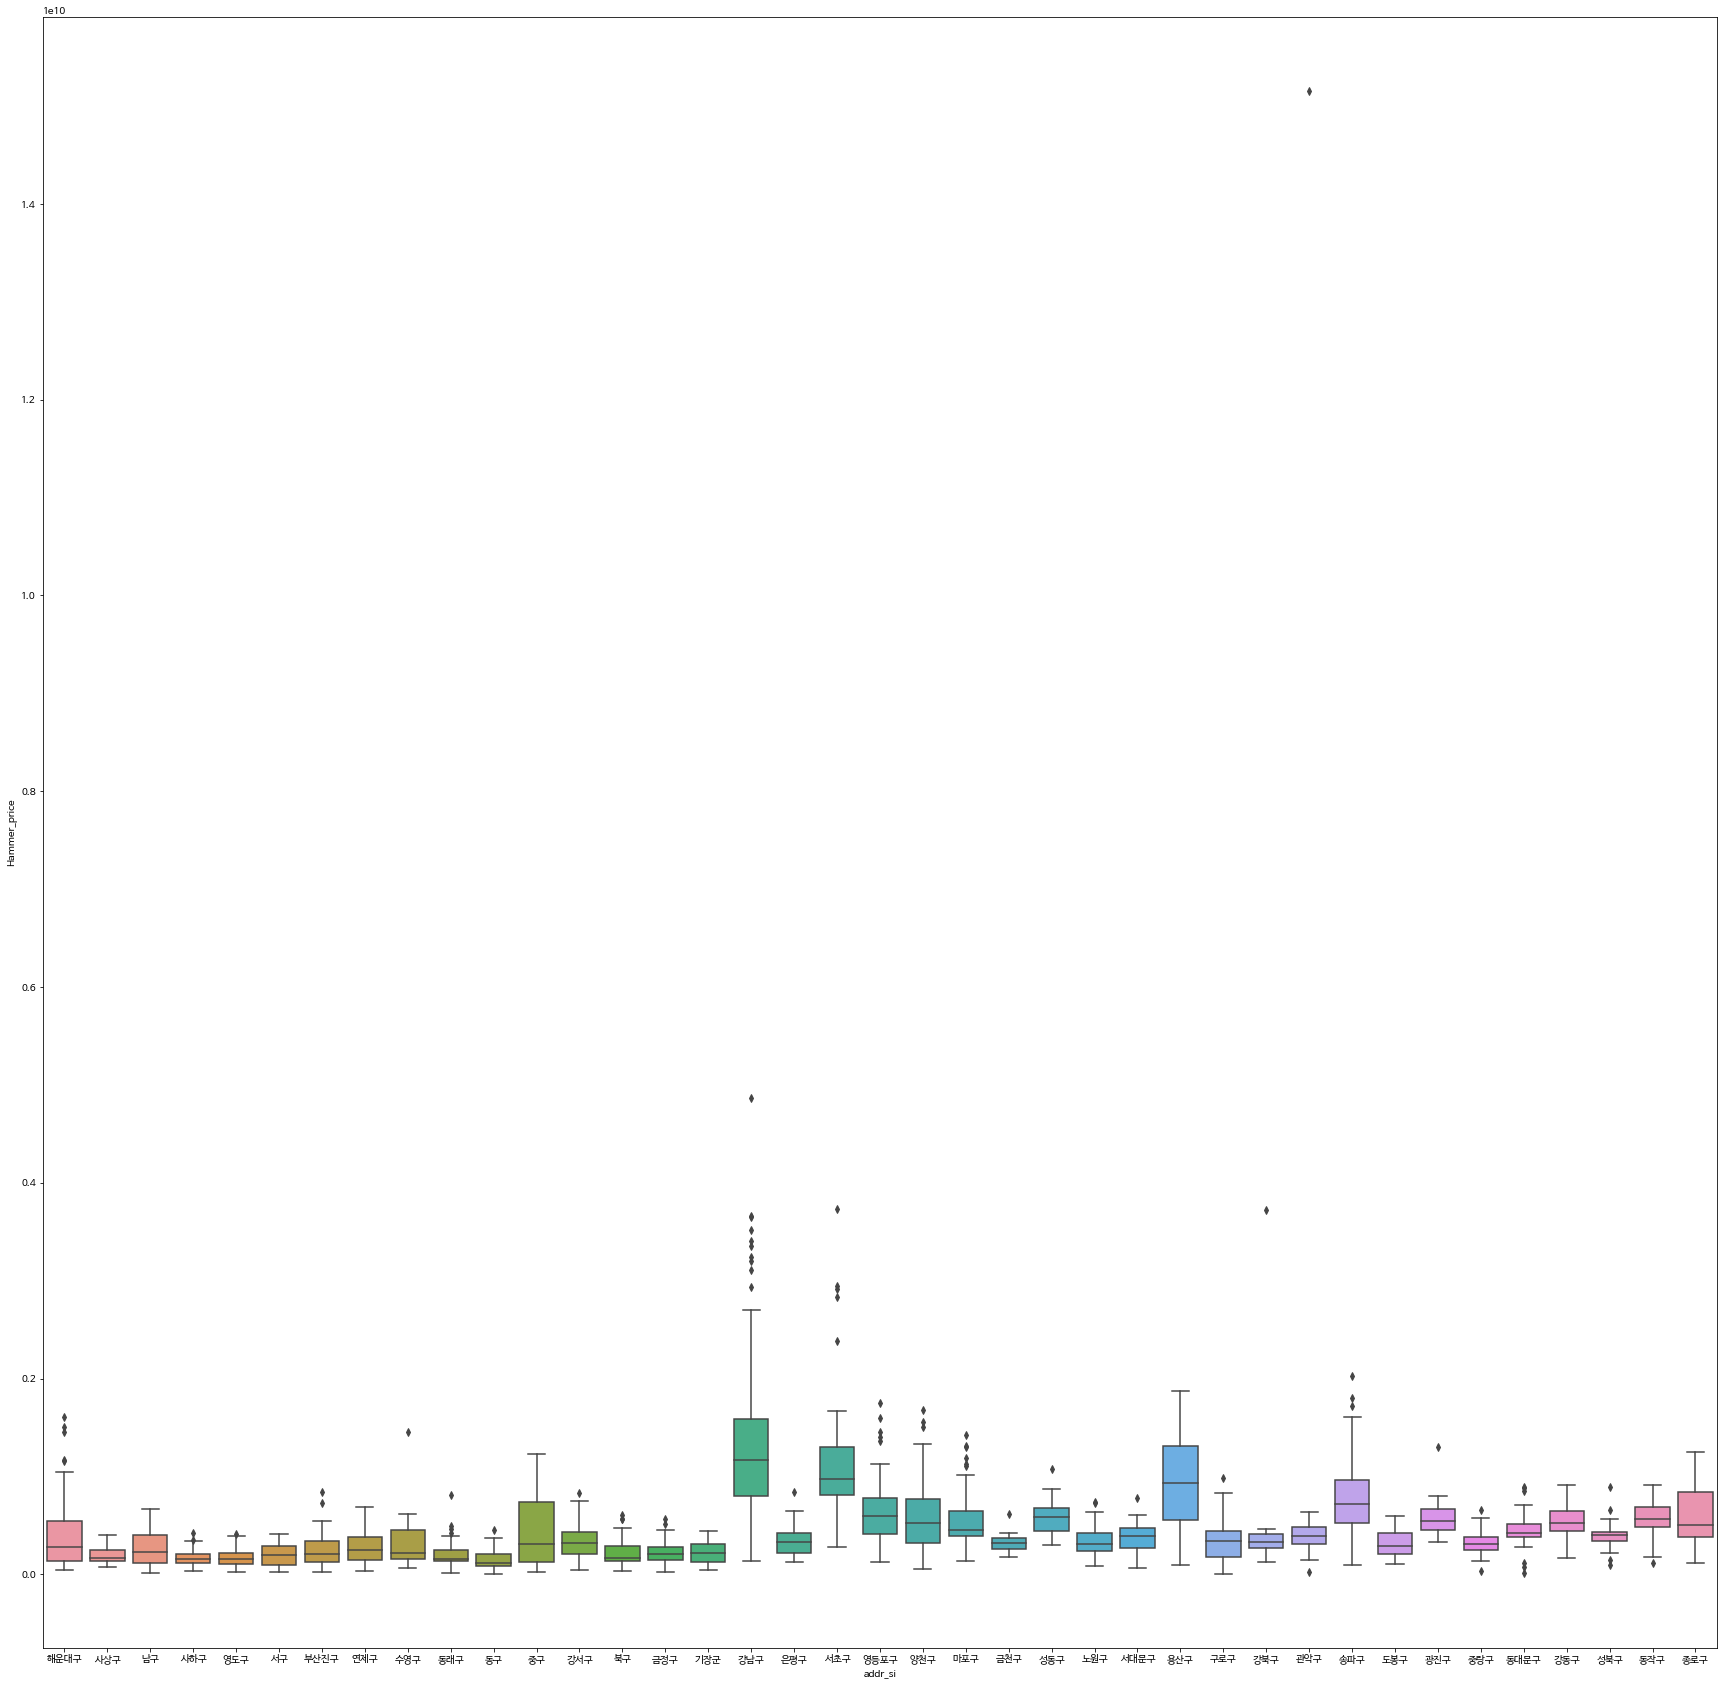

In [41]:
figure, ax1 = plt.subplots(figsize=(30,30))


sns.boxplot(x='addr_si',y="Hammer_price", data = data )

Auction Class에 따른 차이가 크겐 안보임.. (확대하면 다를라나

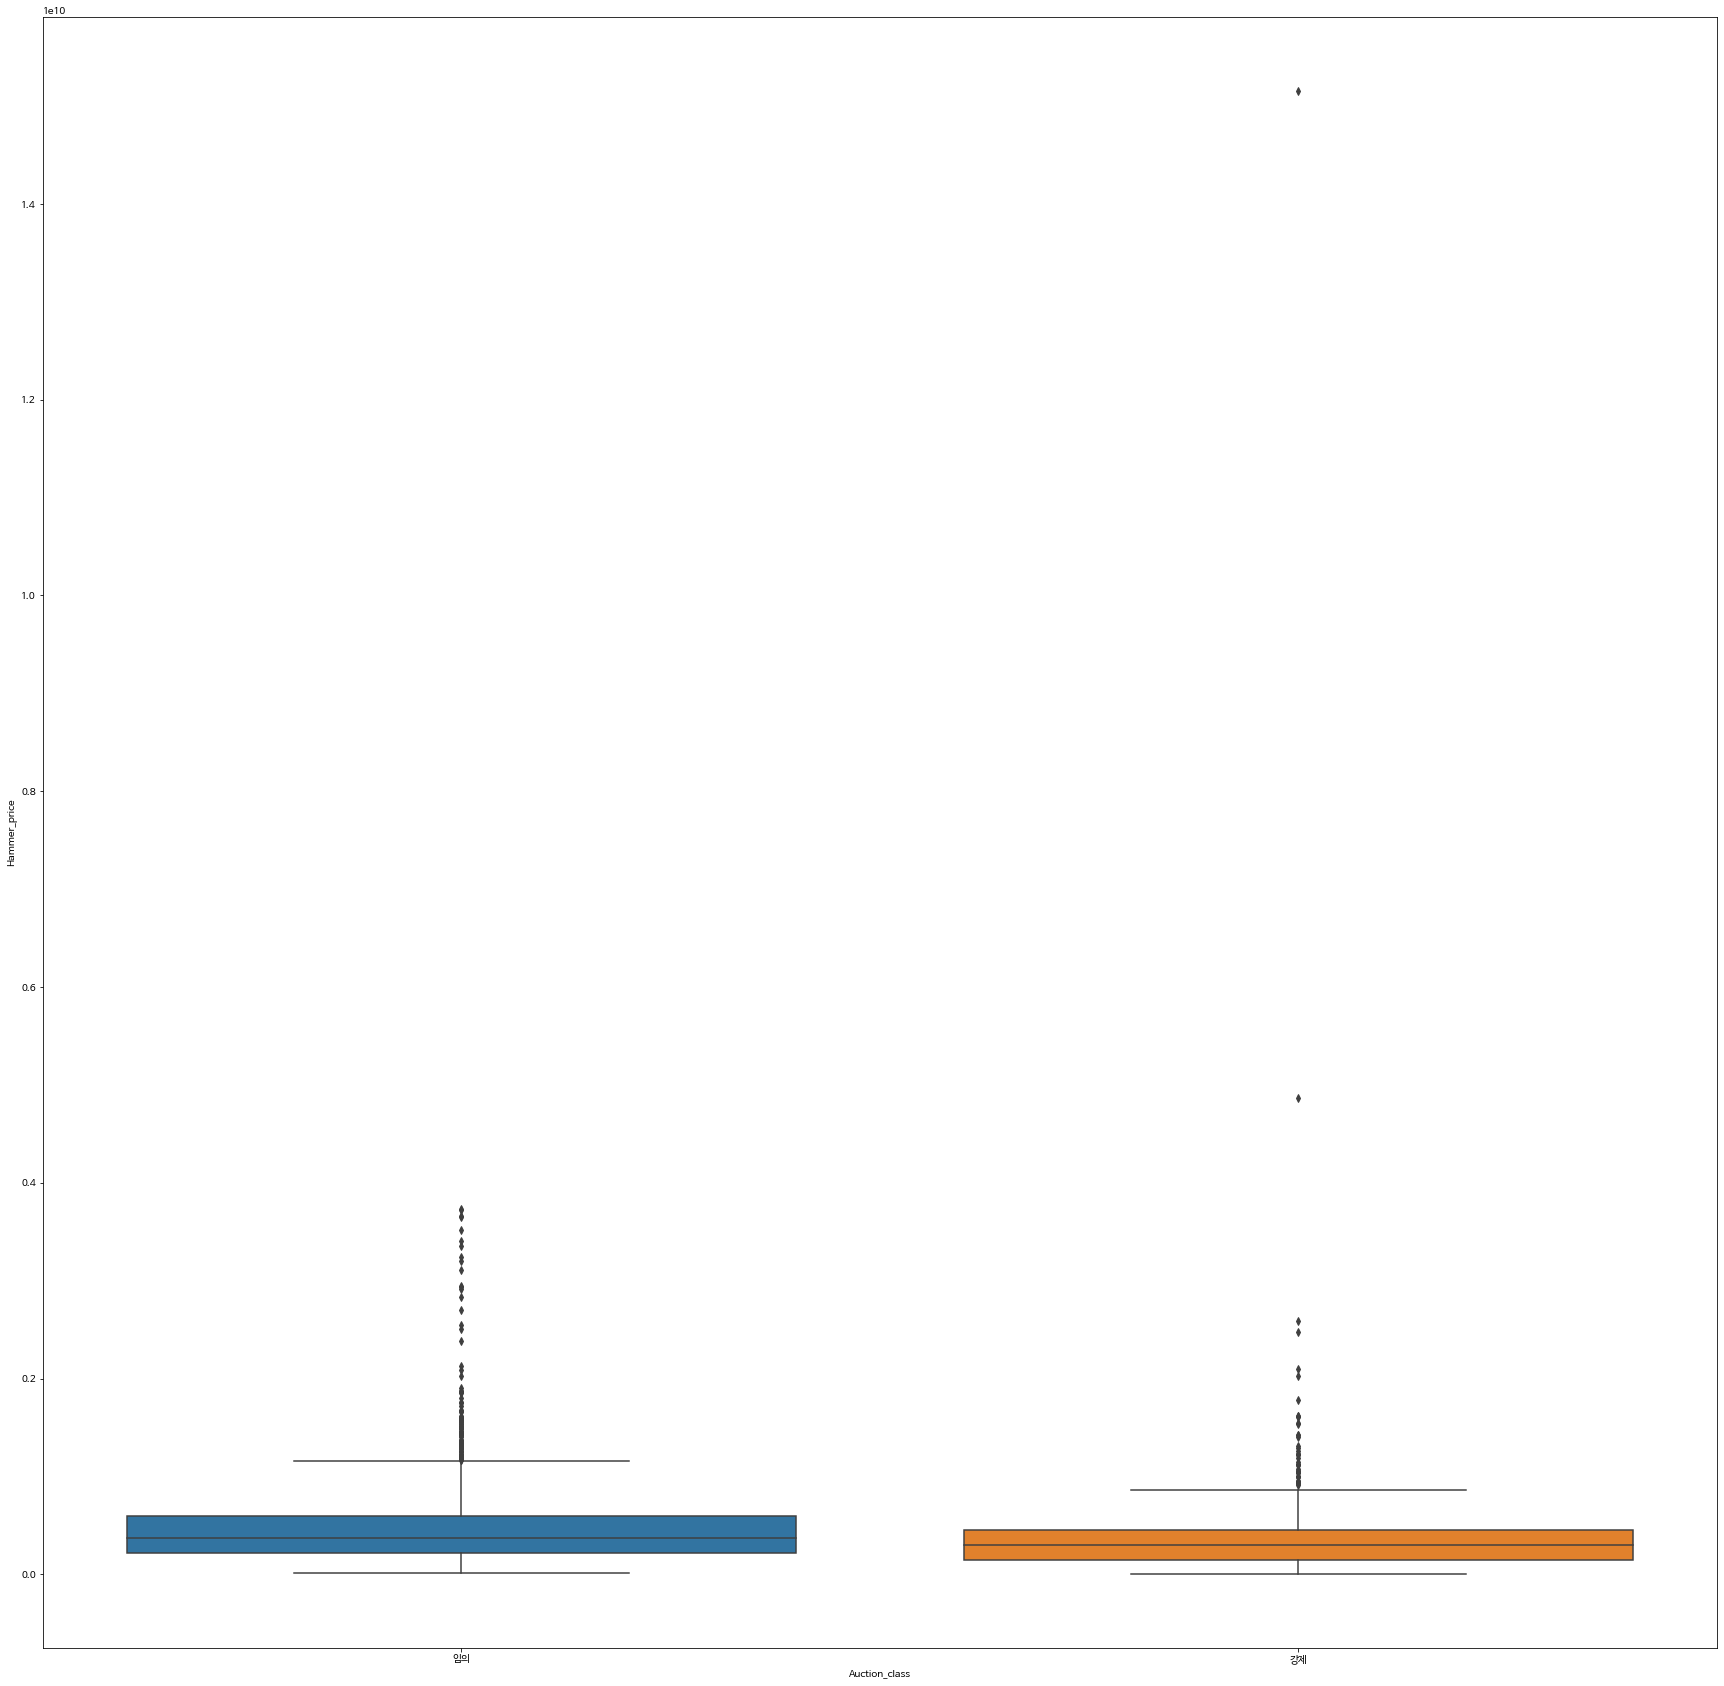

In [42]:
figure, ax1 = plt.subplots(figsize=(30,30))


sns.boxplot(x='Auction_class',y="Hammer_price", data = data )

일괄말고는 개별과 일반은 범위가 좀 적네

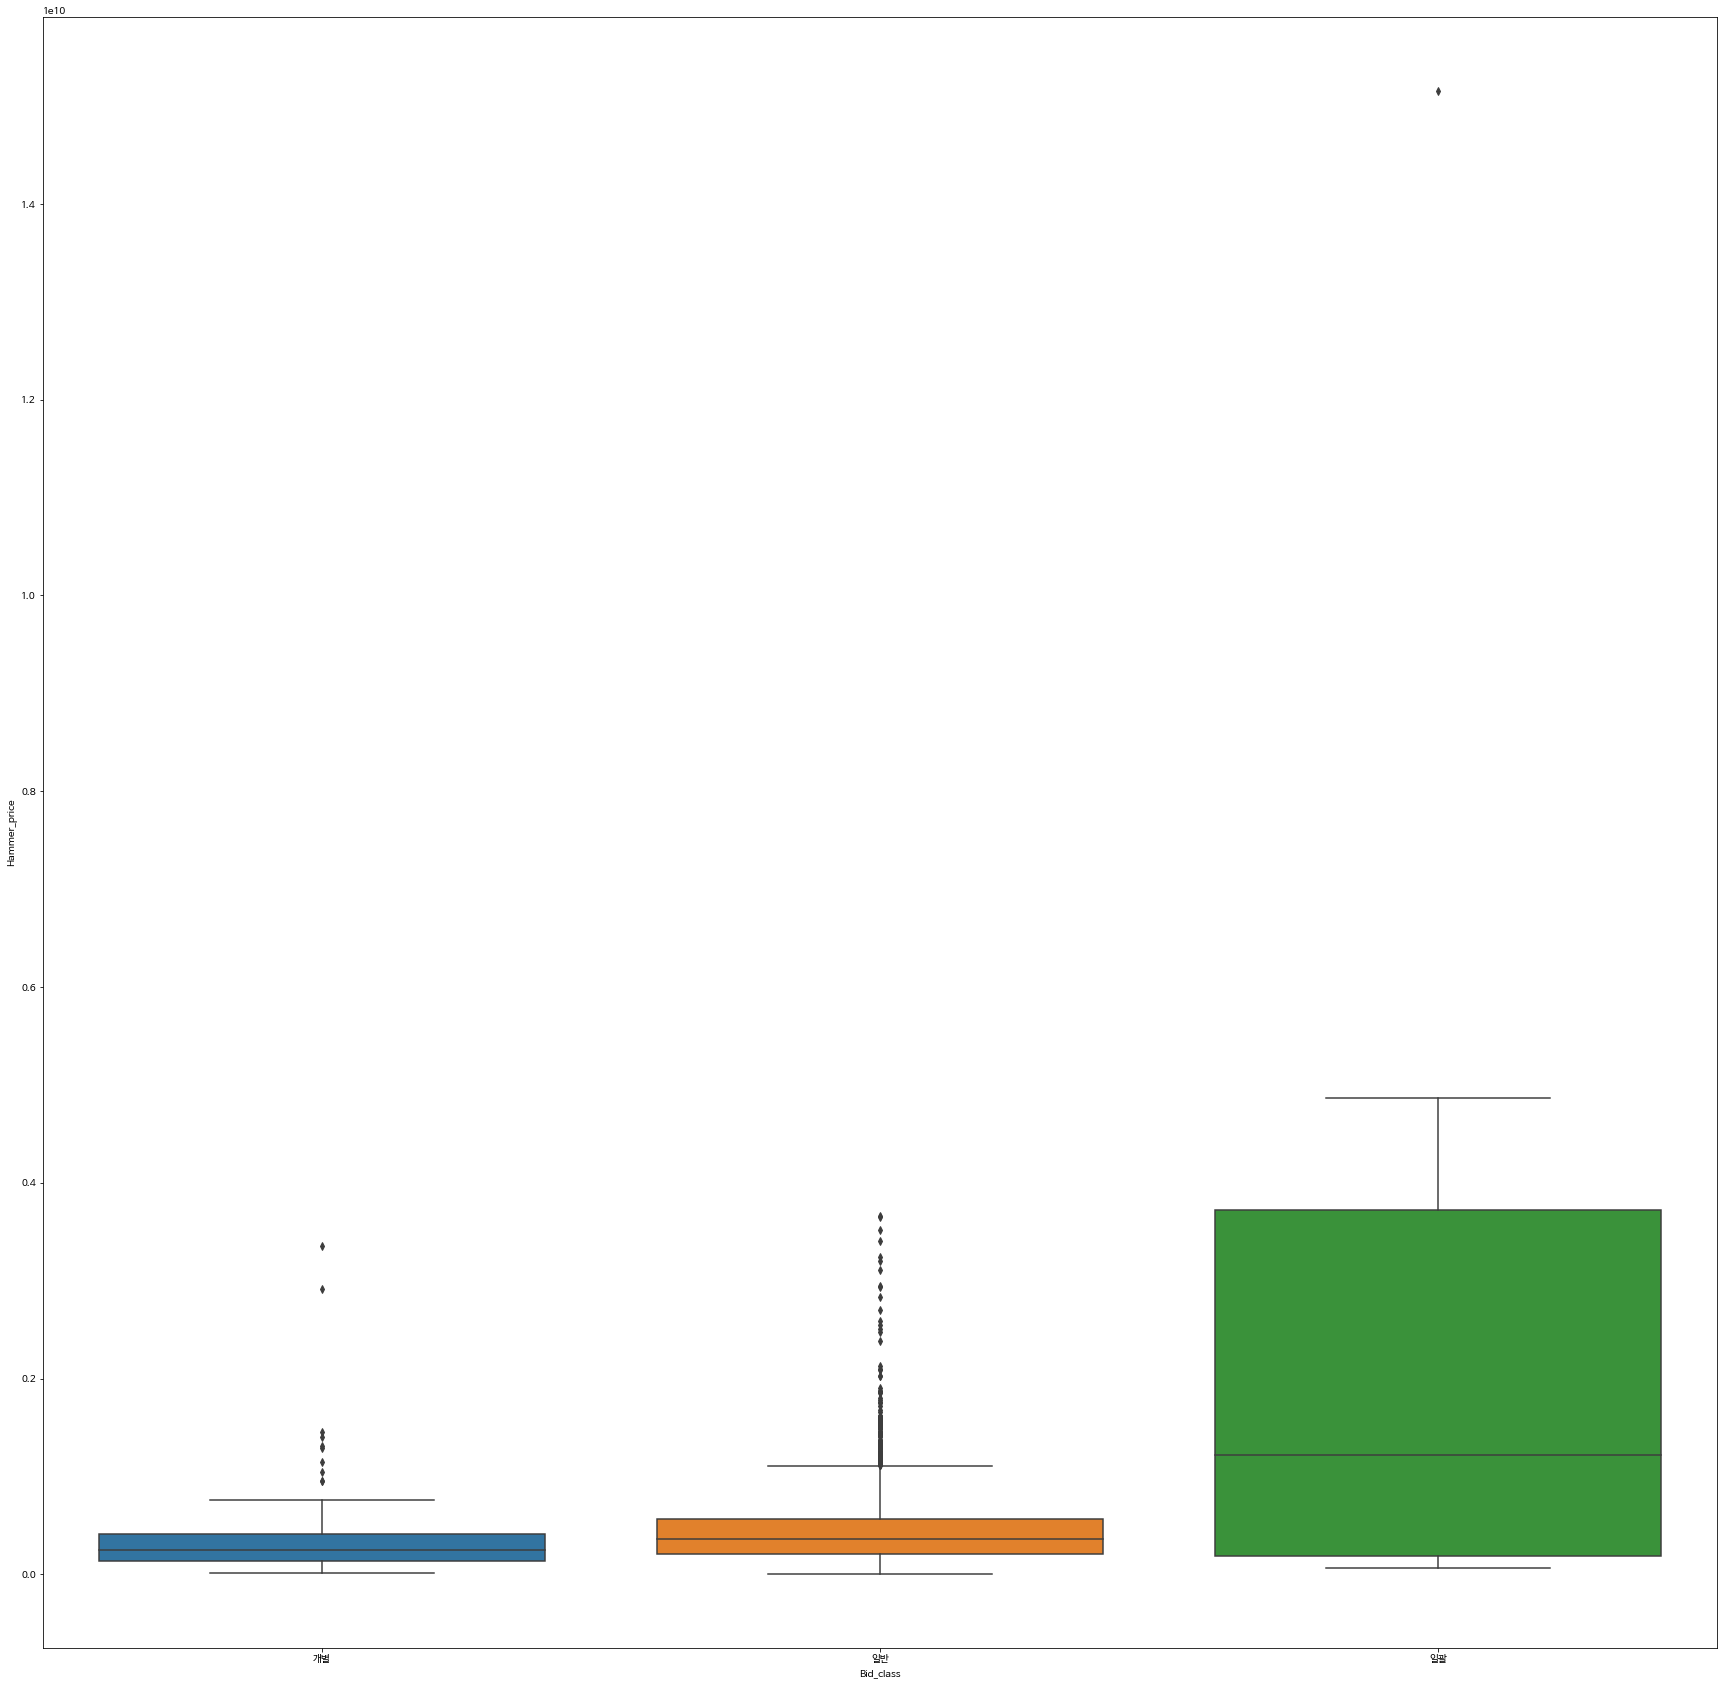

In [43]:
figure, ax1 = plt.subplots(figsize=(30,30))


sns.boxplot(x='Bid_class',y="Hammer_price", data = data )

N일때 조금더 높게 보이는데 유의한 수준일런지

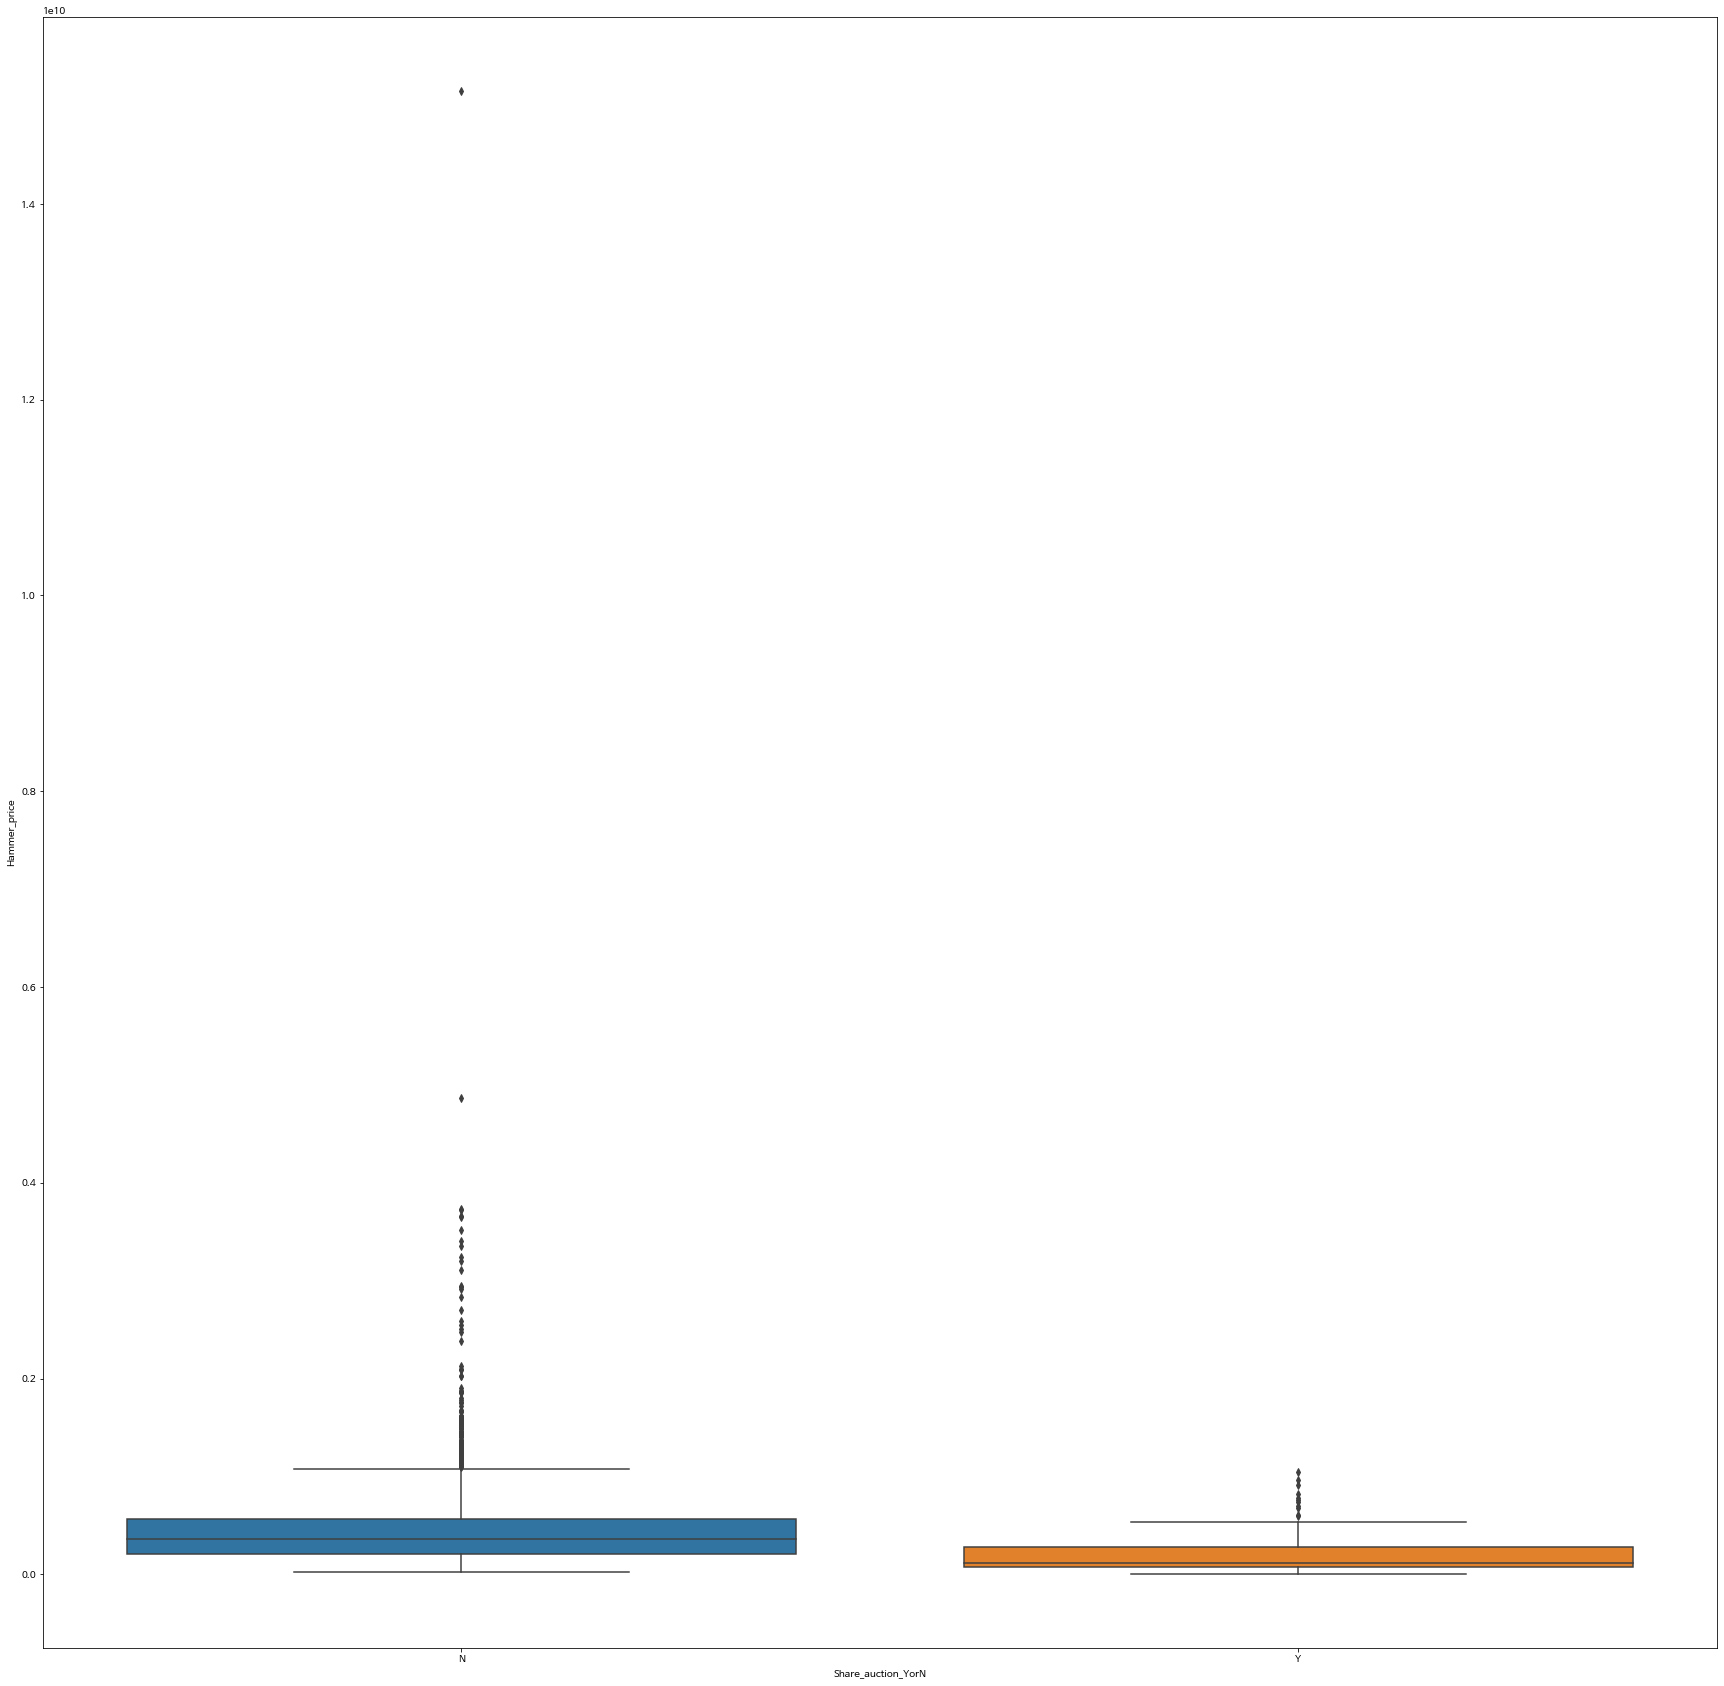

In [44]:
figure, ax1 = plt.subplots(figsize=(30,30))


sns.boxplot(x='Share_auction_YorN',y="Hammer_price", data = data )

얘도 크게 차이가 있는지는 모르겠고요

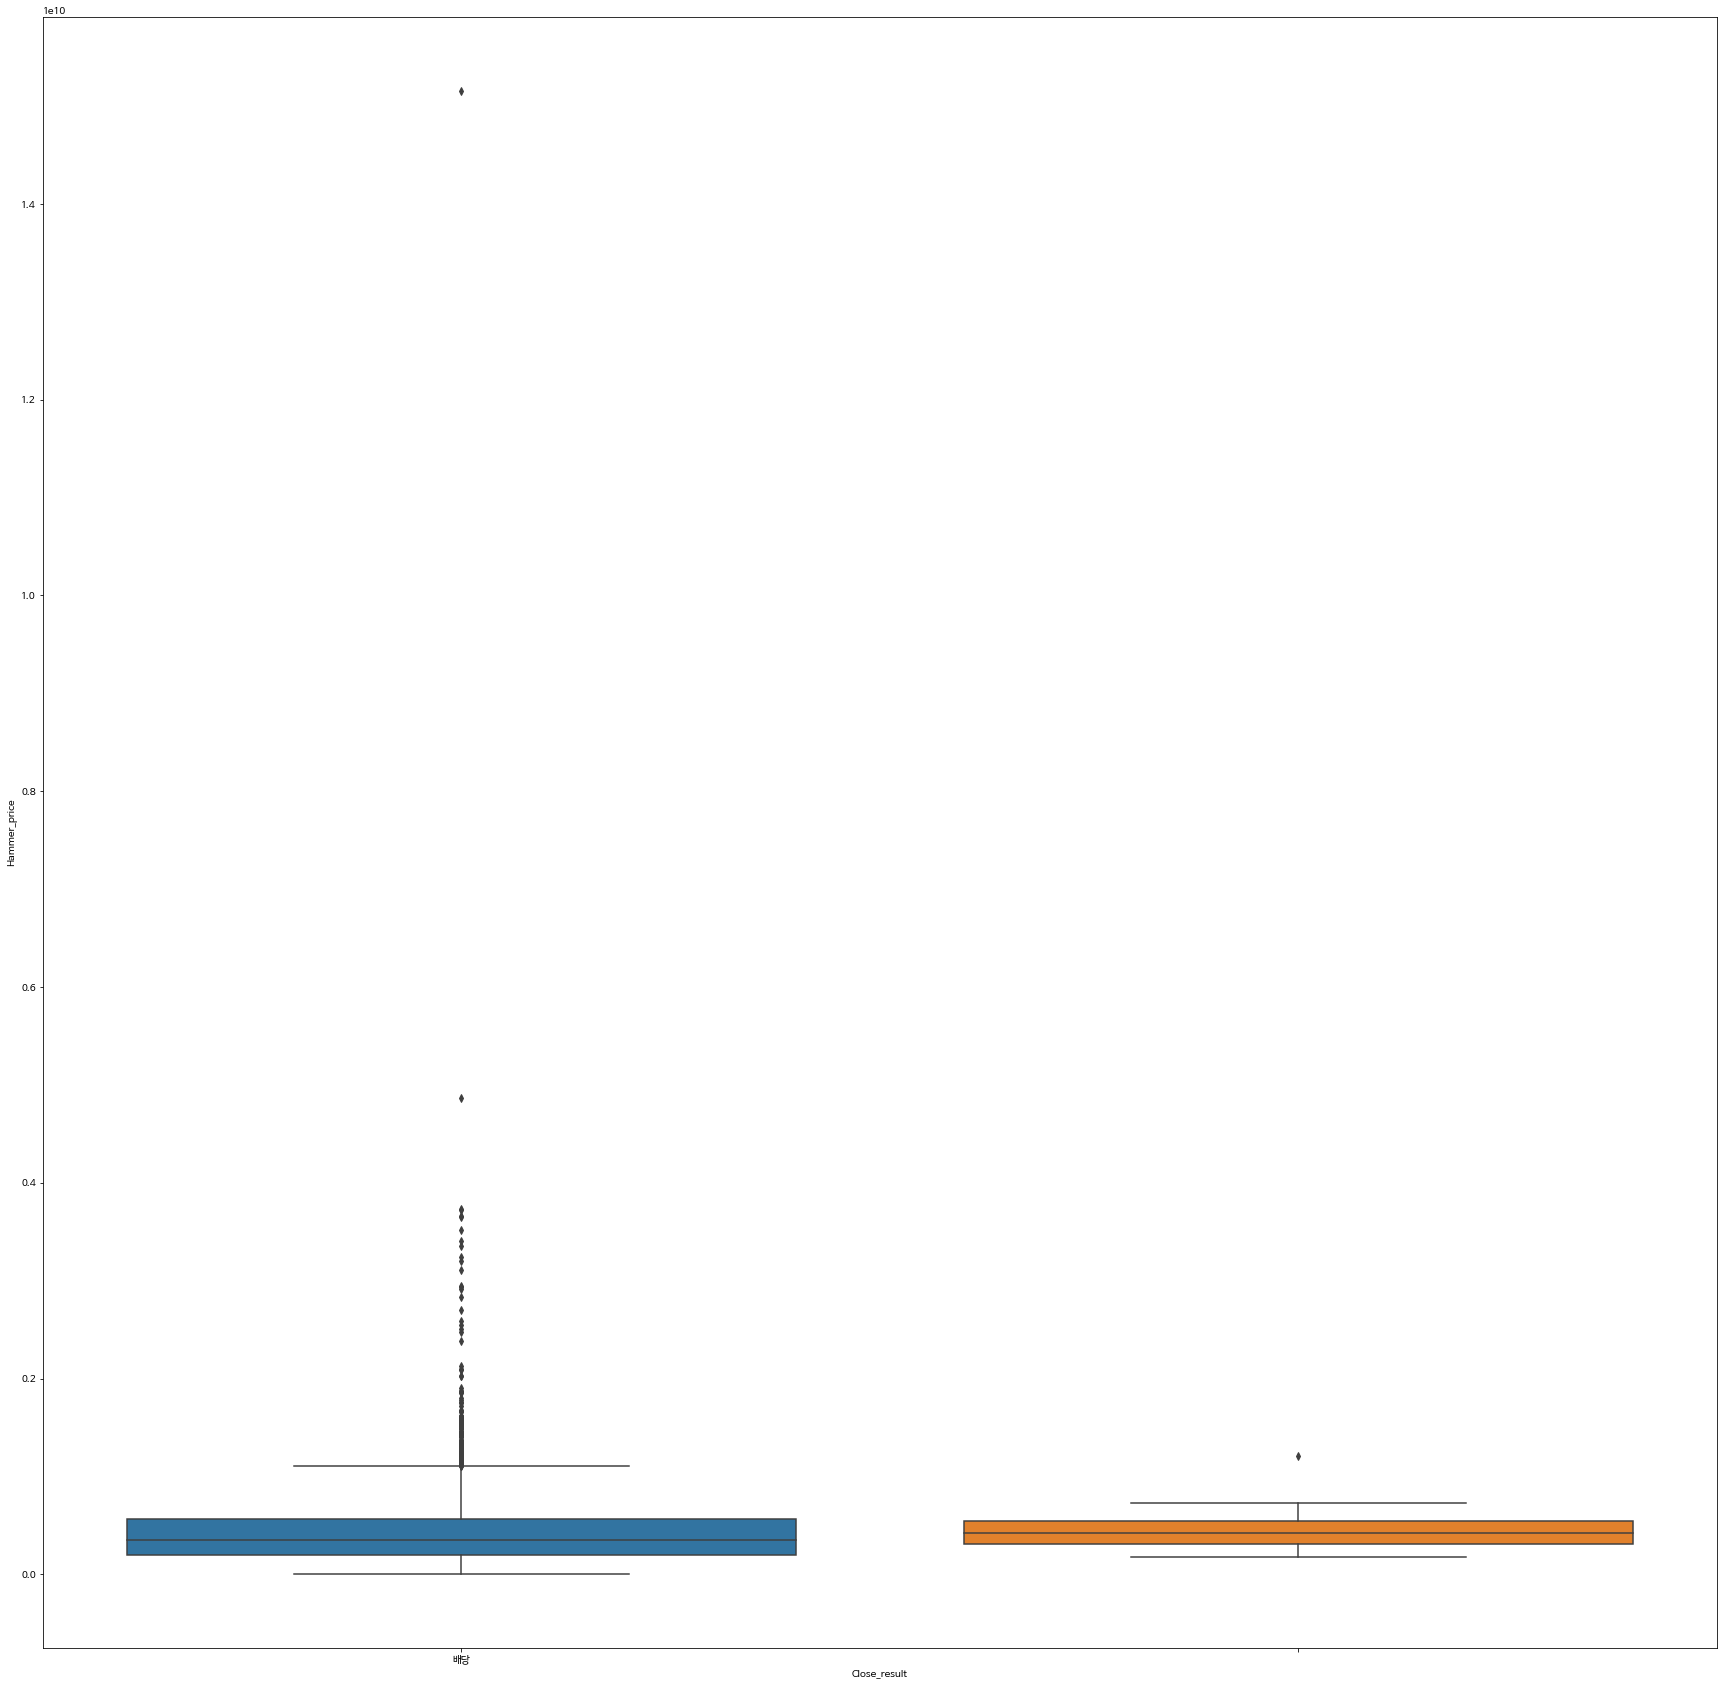

In [45]:
figure, ax1 = plt.subplots(figsize=(30,30))


sns.boxplot(x='Close_result',y="Hammer_price", data = data )

서울이 더 높아보이긴 한다

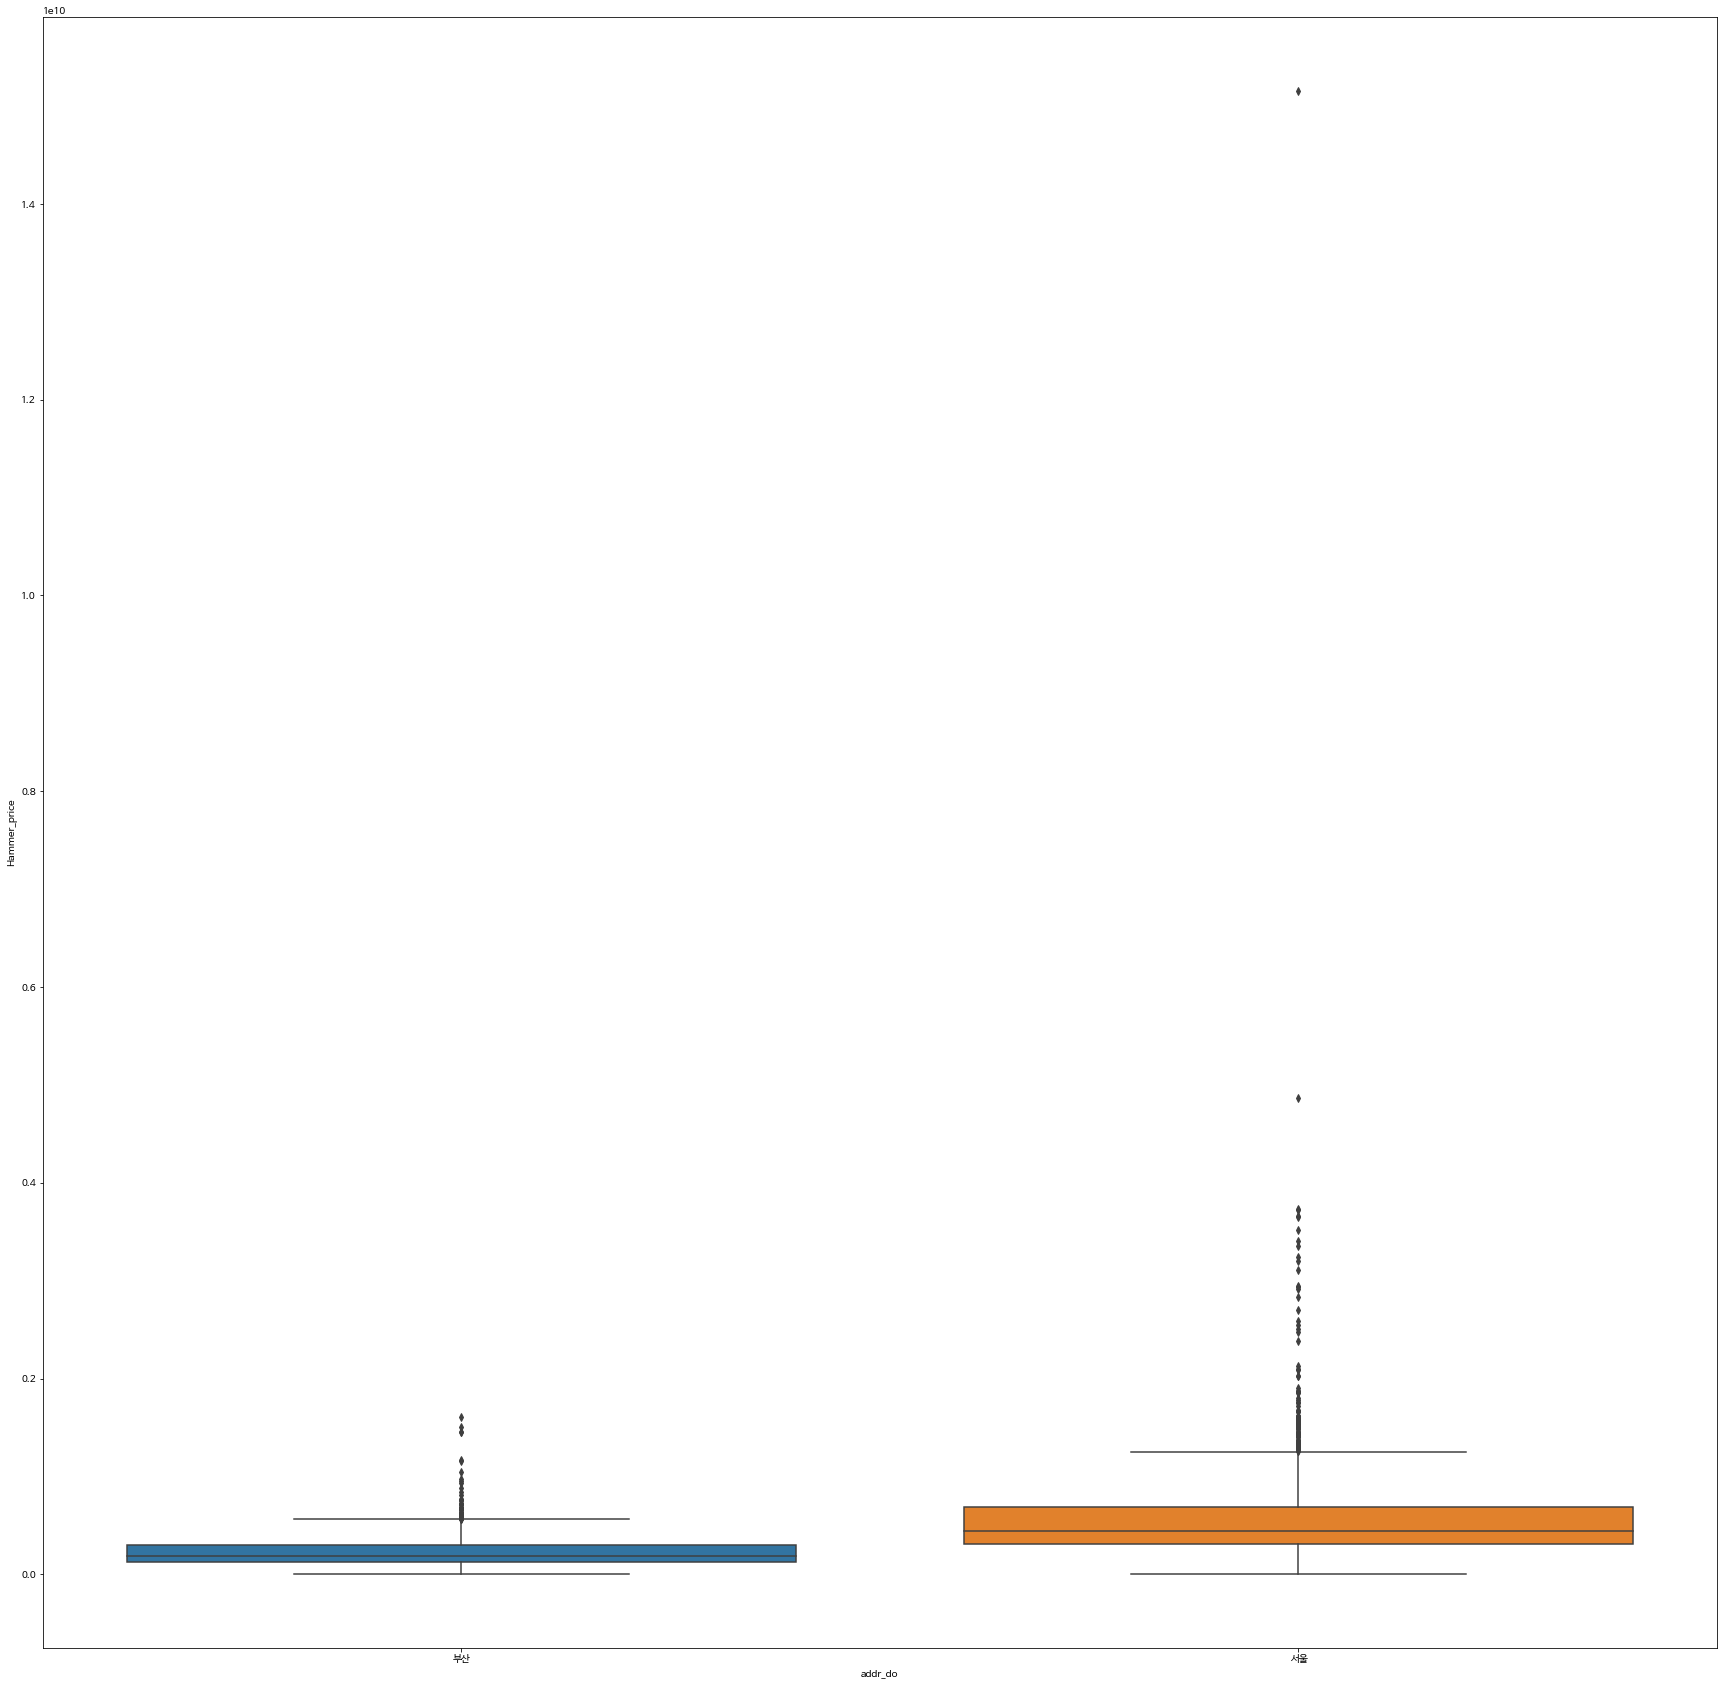

In [46]:
figure, ax1 = plt.subplots(figsize=(30,30))


sns.boxplot(x='addr_do',y="Hammer_price", data = data )

### Correlation 확인



In [ ]:
data.corr()["Hammer_price"]


Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

total_building_area / total_building_auction_area / total_appraisal_price / minimum_sales_price

가 0.75 이상의 상관계수를 보여줌 

### 결측치 확인

In [ ]:
data.isna().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

addr_li / addr_bunji2 / Specific / road_bunji2 삭제하는게 나을듯

위에 언급한 4개 삭제

In [ ]:
data_1 = data.drop(['addr_li', 'addr_bunji2', 'Specific', 'road_bunji2'],axis='columns')

전체 층에서 몇 층인지가 은근 중요하지 않을까...? (조망권 같은거)

In [ ]:
data_1['floor_importance'] = data_1['Current_floor'] / data_1['Total_floor']

In [ ]:
data_1.corr()['Hammer_price']

Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
floor_importance               0.008581
Name: Hammer_price, dtype: float64

그닥 아니었다 ㅎ

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


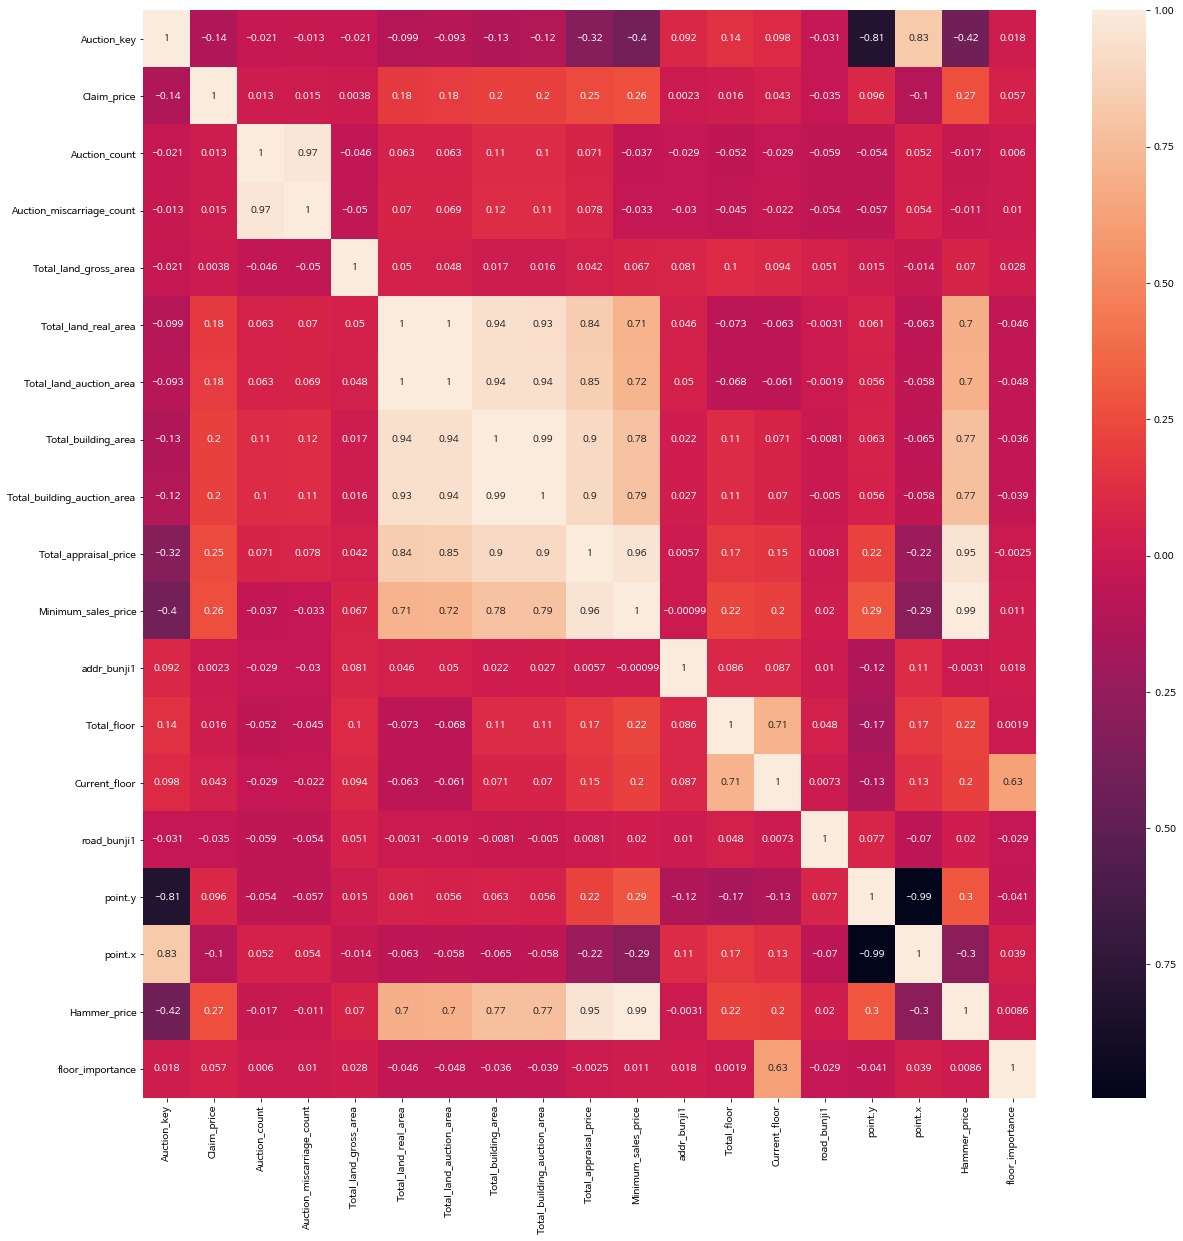

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(data_1.iloc[:,:].corr(),annot=True, annot_kws ={'size' :10} )

서로 correlation이 높은 x들...

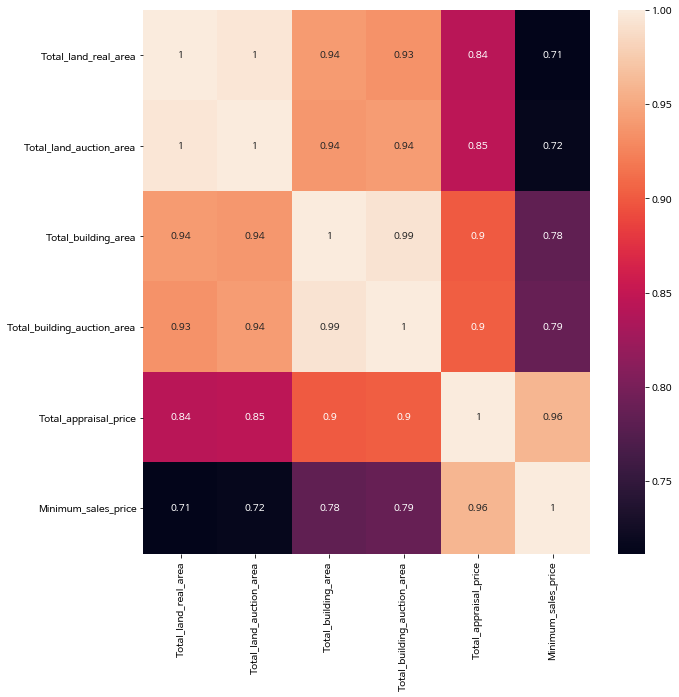

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(data_1.iloc[:,9:16].corr(),annot=True)

total_land_real_area 와 Total_land_auction_area는 상관계수가 1이므로 하나 정도는 그냥 날려버리자

In [ ]:
data_2 = data_1.drop(['Total_land_real_area'],axis='columns')

얘네를 하나로 설명할 만한 하나로 만드는게 효력이 있을까....??? (PCA)

남은 5개끼리 PCA라도 돌려볼까

In [ ]:
data_4pca = data_2.iloc[:,9:14]
data_4pca

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
0,37.35,181.77,181.77,836000000,668800000
1,18.76,118.38,118.38,1073000000,858400000
2,71.00,49.94,49.94,119000000,76160000
3,32.98,84.91,84.91,288400000,230720000
4,45.18,84.96,84.96,170000000,136000000
...,...,...,...,...,...
1928,40.55,84.87,84.87,401000000,401000000
1929,39.60,114.81,114.81,454000000,363200000
1930,19.03,133.98,133.98,1285000000,1028000000
1931,42.20,84.94,84.94,407000000,325600000


In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_4pca), columns=data_4pca.columns, index = data_4pca.index)

In [ ]:
data_scaled.cov()

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
Total_land_auction_area,1.000518,0.938630,0.942169,0.845680,0.716261
Total_building_area,0.938630,1.000518,0.994048,0.900768,0.783704
Total_building_auction_area,0.942169,0.994048,1.000518,0.902455,0.787774
Total_appraisal_price,0.845680,0.900768,0.902455,1.000518,0.960854
Minimum_sales_price,0.716261,0.783704,0.787774,0.960854,1.000518


In [ ]:
data_scaled.corr()

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
Total_land_auction_area,1.000000,0.938144,0.941681,0.845243,0.715891
Total_building_area,0.938144,1.000000,0.993533,0.900302,0.783299
Total_building_auction_area,0.941681,0.993533,1.000000,0.901988,0.787366
Total_appraisal_price,0.845243,0.900302,0.901988,1.000000,0.960357
Minimum_sales_price,0.715891,0.783299,0.787366,0.960357,1.000000


In [ ]:
#PCA 고
from sklearn.decomposition import PCA
pca = PCA(random_state=2016147006)
X_p = pca.fit_transform(data_scaled)

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 4.4MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=5734342d74fc1b7f65262a786fcab1f569654bb379c17f4ca2c3706d4d81f94e
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
#Eigenvalue
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=data_scaled.shape[1], rotation= None)
fa.fit(data_scaled)

ev, v = fa.get_eigenvalues()
ev

array([4.5120747 , 0.39688996, 0.07155905, 0.01320159, 0.00627471])

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


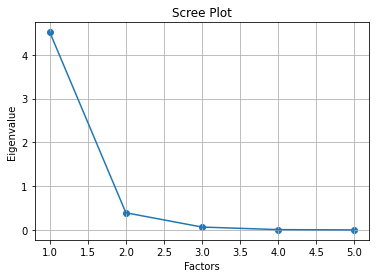

In [ ]:
plt.scatter(range(1, data_scaled.shape[1]+1),ev)
plt.plot(range(1,data_scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
each_variance_ratio #각 PC별 분산 설명 비율

array([0.90241494, 0.07937799, 0.01431181, 0.00264032, 0.00125494])

In [ ]:
# 누적 분산 설명 비율
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)

pd.Series(np.cumsum(pca.explained_variance_ratio_)) #고유값을 기준으로 설명 가능한 분산 (누적)
# 위의 것을 np.cumsum(pca.explained_variance_ratio_) 으로 써도 실행됨.

0    0.902415
1    0.981793
2    0.996105
3    0.998745
4    1.000000
dtype: float64

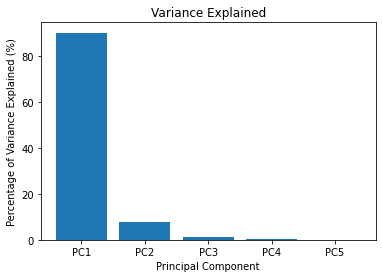

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [ ]:
pd.DataFrame(pca.components_[:,:2], 
             columns = ['PC1','PC2'], 
             index=data_scaled.columns)

,PC1,PC2
Total_land_auction_area,0.440983,0.458340
Total_building_area,0.448332,0.290664
Total_building_auction_area,0.772310,-0.465766
Total_appraisal_price,-0.082153,-0.023195
Minimum_sales_price,0.036328,0.698544


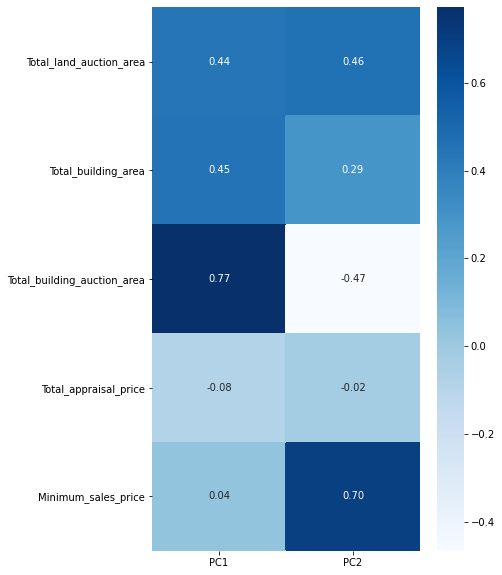

In [ ]:
pca_result = pd.DataFrame(pca.components_[:,:2], 
             columns = ['PC1','PC2'], 
             index=data_scaled.columns)
plt.figure(figsize=(6,10))
sns.heatmap(pca_result, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지

In [ ]:
X_pp = pd.DataFrame(X_p[:,:2], 
                    columns = ['PC1','PC2'], 
                    index = data_scaled.index)
X_pp #PCA 이후 만들어진 data (PC1~ PC6로 총 6개 변수로 축소)

,PC1,PC2
0,1.125741,-0.071411
1,0.750166,-0.917693
2,-0.692931,0.610115
3,-0.421034,0.243037
4,-0.486025,0.514748
...,...,...
1928,-0.162867,0.003050
1929,0.087711,0.187576
1930,1.150826,-1.167651
1931,-0.210605,0.118351


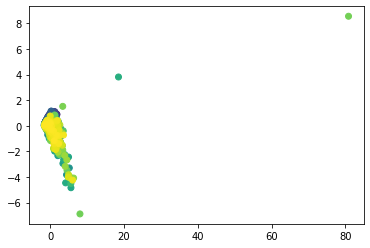

In [ ]:
# Principal Component Pattern Plot 1
plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

아님 FA 해볼까

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(22103.97659189923, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model =calculate_kmo(data_scaled)
kmo_model # 0.8 이상이므로 꽤 좋음

0.7961203929810252

In [ ]:
fa = FactorAnalyzer(n_factors=2, rotation = "varimax")
fa.fit(data_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [ ]:
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2'],
                                 index=data_scaled.columns)
fa_result_loading

,Factor1,Factor2
Total_land_auction_area,0.847332,0.418050
Total_building_area,0.873027,0.476123
Total_building_auction_area,0.875420,0.478382
Total_appraisal_price,0.603378,0.787810
Minimum_sales_price,0.397485,0.914265


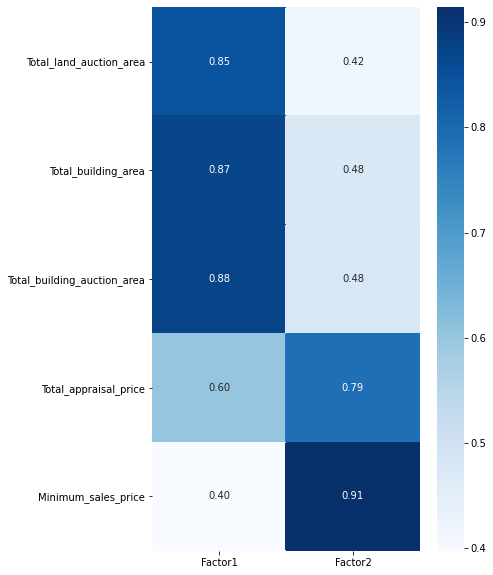

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa = FactorAnalyzer(n_factors=2, rotation = "varimax")
fa.fit(data_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [ ]:
fa_result_loading_final = pd.DataFrame(fa.loadings_, 
                                       columns = ['Factor1', 'Factor2'],
                                       index=data_scaled.columns)
fa_result_loading_final

,Factor1,Factor2
Total_land_auction_area,0.847332,0.418050
Total_building_area,0.873027,0.476123
Total_building_auction_area,0.875420,0.478382
Total_appraisal_price,0.603378,0.787810
Minimum_sales_price,0.397485,0.914265


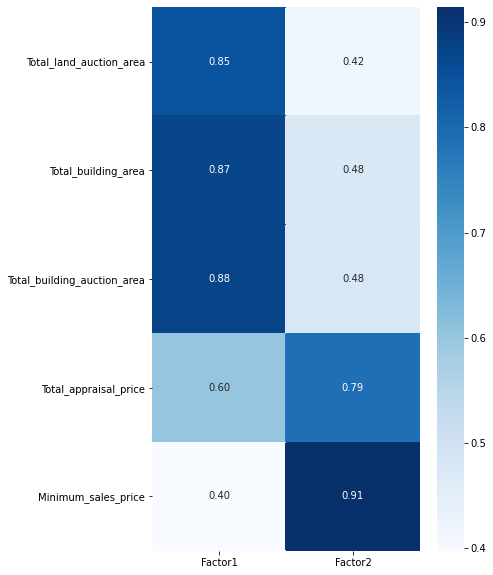

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_final, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa.get_factor_variance()
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2
SS Loadings,2.768566,2.086833
Proportion Var,0.553713,0.417367
Cumulative Var,0.553713,0.971080


Factor 1 : 면적에 관련된 Factor

Factor 2 : 가격에 관련된 Factor

In [ ]:
X_f = fa.fit_transform(data_scaled)
X_ff = pd.DataFrame(X_f[:,:2], 
                    columns = ['Area','Price'], 
                    index = data_scaled.index)
X_ff

,Area,Price
0,0.776758,0.148704
1,-0.329771,1.098878
2,-0.074285,-0.657482
3,0.151135,-0.463668
4,0.290147,-0.729535
...,...,...
1928,-0.128084,0.009743
1929,0.348135,-0.280659
1930,-0.374050,1.479401
1931,0.012299,-0.190510


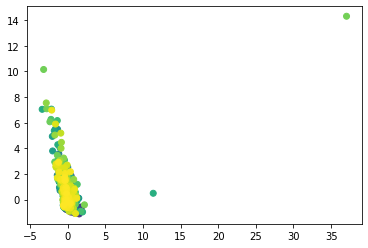

In [ ]:
# Score Plot 1
plt.scatter(x=X_ff['Area'],y=X_ff['Price'], c=X_ff.index)

In [ ]:
new_data = pd.concat([X_ff, data_1['Hammer_price']],axis=1)

In [ ]:
new_data

,Area,Price,Hammer_price
0,0.776758,0.148704,760000000
1,-0.329771,1.098878,971889999
2,-0.074285,-0.657482,93399999
3,0.151135,-0.463668,256899000
4,0.290147,-0.729535,158660000
...,...,...,...
1928,-0.128084,0.009743,402500000
1929,0.348135,-0.280659,430234600
1930,-0.374050,1.479401,1118999990
1931,0.012299,-0.190510,403000000


In [ ]:
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
res = ols('Hammer_price~Area+Price',data= new_data).fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hammer_price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 8.938e+04
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        05:56:36   Log-Likelihood:                -37284.
No. Observations:                1933   AIC:                         7.457e+04
Df Residuals:                    1930   BIC:                         7.459e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.727e+08   1.31e+06    360.530      0.000     4.7e+08    4.75e+08
Area        2.103e+08   1.32e+06    159.811      0.000    2.08e+08    2.13e+08
Price       5.145e+08   1.32e+06    390.379      0.000    5.12e+08    5.17e+08
==============================================================================
Omnibus:                     1290.220   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49456.213
Skew:                           2.598   Prob(JB):                         0.00
Kurtosis:                      27.229   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

모형 설명력이 좀 많이 좋은데....???